In [2]:
addpath('code')

In [4]:
load q1x.dat
load q1y.dat

In [7]:
X=q1x;

y=2*(q1y-0.5);

C =1;

m=size(X,1)
n=size(X,2)


m =

    99


n =

     2



In [8]:
cvx_begin
    variables w(n) b xi(m)
    minimize  1/2*sum(w.*w) + C*sum(xi)
    y.*(X*w+b) >= 1- xi;
    xi >= 0
cvx_end

 
Calling SDPT3 4.0: 205 variables, 101 equality constraints
------------------------------------------------------------

 num. of constraints = 101
 dim. of sdp    var  =  4,   num. of sdp  blk  =  2
 dim. of linear var  = 198
 dim. of free   var  =  1 *** convert ublk to lblk
*******************************************************************
   SDPT3: Infeasible path-following algorithms
*******************************************************************
 version  predcorr  gam  expon  scale_data
   HKM      1      0.000   1        0    
it pstep dstep pinfeas dinfeas  gap      prim-obj      dual-obj    cputime
-------------------------------------------------------------------
 0|0.000|0.000|1.5e+00|1.8e+01|7.9e+04| 2.796107e+03  0.000000e+00| 0:0:02| chol  1  1 
 1|1.000|0.851|2.9e-06|2.7e+00|1.4e+04| 2.641007e+03  3.421279e+00| 0:0:04| chol  1  1 
 2|0.939|0.139|1.4e-06|2.3e+00|1.4e+04| 2.711560e+03 -8.070857e+00| 0:0:05| chol  1  1 
 3|1.000|0.487|1.3e-06|1.2e+00|9.0e+03| 2.679

In [9]:
% visualize
xp = linspace(min(X(:,1)), max(X(:,1)), 100);
yp = - (w(1)*xp + b)/w(2);
yp1 = - (w(1)*xp + b - 1)/w(2); % margin boundary for support vectors for y=1
yp0 = - (w(1)*xp + b + 1)/w(2); % margin boundary for support vectors for y=0
idx0 = find(q1y==0);
idx1 = find(q1y==1);

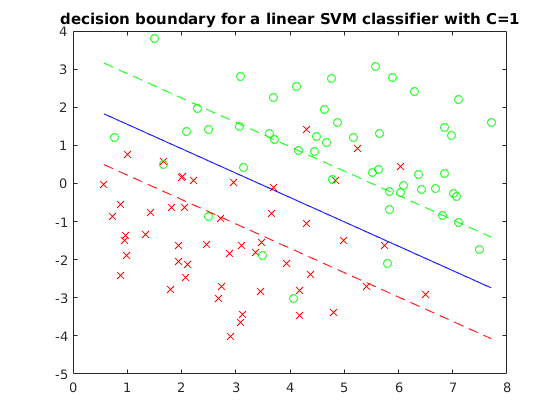

In [10]:
plot(q1x(idx0, 1), q1x(idx0, 2), 'rx'); hold on

plot(q1x(idx1, 1), q1x(idx1, 2), 'go');
plot(xp, yp, '-b', xp, yp1, '--g', xp, yp0, '--r');
hold off
title(sprintf('decision boundary for a linear SVM classifier with C=%g', C));